In [66]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = load_iris()

In [7]:
dataDF = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [8]:
dataDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [26]:
dataDF.rename(columns={"sepal length (cm)":"sepal length","sepal width (cm)":"sepal width",
                       "petal length (cm)":"petal length","petal width (cm)":"petal width"})

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [28]:
dataDF.rename(columns={0:"sepal length",1:"sepal width",
                       2:"petal length",3:"petal width"})

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Data Privacy variables
## &
# Data Privacy Methods

In [9]:
# DP = differnetial Privacy
# DP = f(x) + L(0,b)

# b = value used to generate random noise
# b = Deltaf / epsilon

# Deltaf = difference between highest and lowest observations
# Deltaf = abs(max(f(x)) - min(f(x)))

# epsilon is arbitrary value set by curator
# epsilon is between 0 and 1




#### Calculate Delta f

In [31]:
dataDF.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [36]:
deltaf_sepal_length = np.abs(dataDF['sepal length (cm)'].max() - dataDF['sepal length (cm)'].min())
deltaf_sepal_width = np.abs(dataDF['sepal width (cm)'].max() - dataDF['sepal width (cm)'].min())
deltaf_petal_length = np.abs(dataDF['petal length (cm)'].max() - dataDF['petal length (cm)'].min())
deltaf_petal_width = np.abs(dataDF['petal width (cm)'].max() - dataDF['petal width (cm)'].min())


print("Delta f sepal length: {}".format(deltaf_sepal_length))
print("Delta f sepal width: {}".format(deltaf_sepal_width))
print("Delta f petal length: {}".format(deltaf_petal_length))
print("Delta f petal width: {}".format(deltaf_petal_width))

Delta f sepal length: 3.6000000000000005
Delta f sepal width: 2.4000000000000004
Delta f petal length: 5.9
Delta f petal width: 2.4


### Choose arbitrary epsilon

In [37]:
epsilon = 0.15

### Calculate b

In [38]:
# b = value used to generate random noise
# b = Deltaf / epsilon
b_sepal_length = deltaf_sepal_length / epsilon
b_sepal_width = deltaf_sepal_width / epsilon
b_petal_length = deltaf_petal_length / epsilon
b_petal_width = deltaf_petal_width / epsilon


print("b sepal length: {}".format(b_sepal_length))
print("b sepal width: {}".format(b_sepal_width))
print("b petal length: {}".format(b_petal_length))
print("b petal width: {}".format(b_petal_width))

b sepal length: 24.000000000000004
b sepal width: 16.000000000000004
b petal length: 39.333333333333336
b petal width: 16.0


In [ ]:
random.uniform(0, b_sepal_length)

In [42]:
laplace_noise_sepal_length = np.random.laplace(loc=(b_sepal_length/2.0), scale=1)
laplace_noise_sepal_width = np.random.laplace(loc=(b_sepal_width/2.0), scale=1)
laplace_noise_petal_length = np.random.laplace(loc=(b_petal_length/2.0), scale=1)
laplace_noise_petal_width = np.random.laplace(loc=(b_petal_width/2.0), scale=1)

print("laplace_noise_sepal_length: {}".format(laplace_noise_sepal_length))
print("laplace_noise_sepal_width: {}".format(laplace_noise_sepal_width))
print("laplace_noise_petal_length: {}".format(laplace_noise_petal_length))
print("laplace_noise_petal_width: {}".format(laplace_noise_petal_width))

laplace_noise_sepal_length: 11.778318852835502
laplace_noise_sepal_width: 9.63314690782342
laplace_noise_petal_length: 20.20080530305709
laplace_noise_petal_width: 9.03745747290002


In [52]:
sepal_length_array = dataDF['sepal length (cm)'].values.tolist()
Private_SL_array = [x + laplace_noise_sepal_length for x in sepal_length_array]

sepal_width_array = dataDF['sepal width (cm)'].values.tolist()
Private_SW_array = [x + laplace_noise_sepal_width for x in sepal_width_array]

petal_length_array = dataDF['petal length (cm)'].values.tolist()
Private_PL_array = [x + laplace_noise_petal_length for x in petal_length_array]

petal_width_array = dataDF['petal width (cm)'].values.tolist()
Private_PW_array = [x + laplace_noise_petal_width for x in petal_width_array]




,Privatized Sepal Length,Privatized Sepal Width,Privatized Petal Length,Privatized Petal Width
0,"[16.878318852835502, 16.678318852835503, 16.47...","[13.13314690782342, 12.63314690782342, 12.8331...","[21.60080530305709, 21.60080530305709, 21.5008...","[9.237457472900019, 9.237457472900019, 9.23745..."


In [62]:

private_list_all_data = list(zip(Private_SL_array,Private_SW_array,Private_PL_array,Private_PW_array,))
private_column_names = ['Privatized Sepal Length', 'Privatized Sepal Width','Privatized Petal Length','Privatized Petal Width']

In [63]:
privateDF = pd.DataFrame(private_list_all_data,
                  columns = private_column_names) 

In [64]:
privateDF.head()

,Privatized Sepal Length,Privatized Sepal Width,Privatized Petal Length,Privatized Petal Width
0,16.878319,13.133147,21.600805,9.237457
1,16.678319,12.633147,21.600805,9.237457
2,16.478319,12.833147,21.500805,9.237457
3,16.378319,12.733147,21.700805,9.237457
4,16.778319,13.233147,21.600805,9.237457


In [65]:
privateDF.tail()

,Privatized Sepal Length,Privatized Sepal Width,Privatized Petal Length,Privatized Petal Width
145,18.478319,12.633147,25.400805,11.337457
146,18.078319,12.133147,25.200805,10.937457
147,18.278319,12.633147,25.400805,11.037457
148,17.978319,13.033147,25.600805,11.337457
149,17.678319,12.633147,25.300805,10.837457


In [90]:
SLstddev = dataDF['sepal length (cm)'].std()
SWstddev = dataDF['sepal width (cm)'].std()
PLstddev = dataDF['petal length (cm)'].std()
PWstddev = dataDF['petal width (cm)'].std()
print("Given Sepal Length standard dev: {}".format(SLstddev))
print("Given Sepal Width standard dev: {}".format(SWstddev))
print("Given Petal Length standard dev: {}".format(PLstddev))
print("Given Petal Width standard dev: {}".format(PWstddev))

Given Sepal Length standard dev: 0.828066127977863
Given Sepal Width standard dev: 0.4358662849366982
Given Petal Length standard dev: 1.7652982332594662
Given Petal Width standard dev: 0.7622376689603465


In [88]:
pSLstddev = privateDF['Privatized Sepal Length'].std()
pSWstddev = privateDF['Privatized Sepal Width'].std()
pPLstddev = privateDF['Privatized Petal Length'].std()
pPWstddev = privateDF['Privatized Petal Width'].std()
print("Privatized Sepal Length standard dev: {}".format(pSLstddev))
print("Privatized Sepal Width standard dev: {}".format(pSWstddev))
print("Privatized Petal Length standard dev: {}".format(pPLstddev))
print("Privatized Petal Width standard dev: {}".format(pPWstddev))

Privatized Sepal Length standard dev: 0.828066127977863
Privatized Sepal Width standard dev: 0.4358662849366982
Privatized Petal Length standard dev: 1.7652982332594662
Privatized Petal Width standard dev: 0.7622376689603467


No handles with labels found to put in legend.


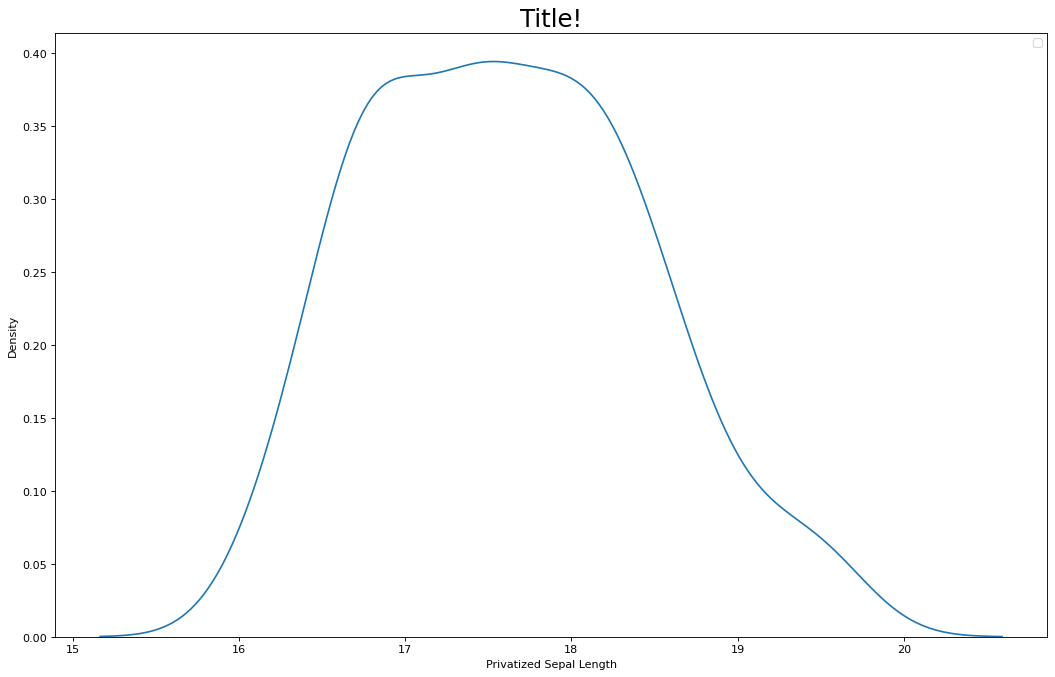

In [72]:
plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(data=privateDF['Privatized Sepal Length'])
plt.title('Title!', fontsize=22)
plt.legend()
plt.show()

<AxesSubplot:ylabel='Density'>

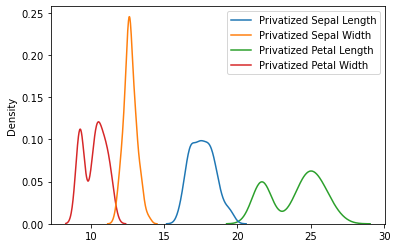

In [73]:
sns.kdeplot(data=privateDF)

<AxesSubplot:ylabel='Density'>

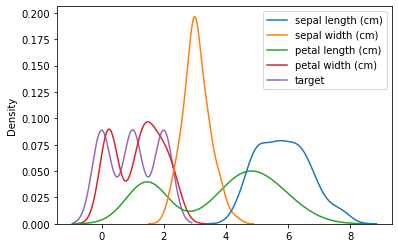

In [77]:
sns.kdeplot(data=dataDF)